<a href="https://colab.research.google.com/github/Dipendra-Pal/ANN/blob/main/k_Means_Clustering_for_2_Features_with_k%3D2_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged after 2 iterations

Cluster Assignments (first 10): [1 1 1 1 1 1 1 1 1 1]
Final Centroids:
 [[5.0085 5.0107]
 [0.9966 1.0004]]
Within-Cluster Sum of Squares (WCSS): 10043.7396


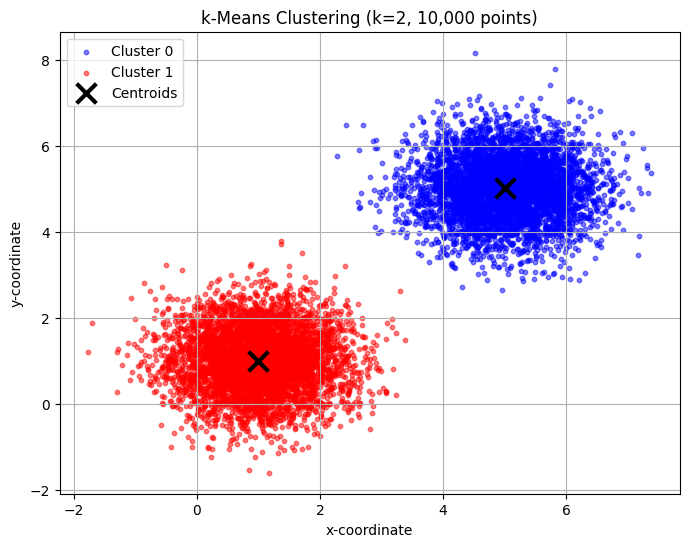

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dataset
def generate_and_save_dataset(n_samples=10000):
    np.random.seed(42)
    # Generate two clusters: 5000 points around (1, 1) and 5000 around (5, 5)
    cluster1 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], n_samples // 2)
    cluster2 = np.random.multivariate_normal([5, 5], [[0.5, 0], [0, 0.5]], n_samples // 2)
    data = np.vstack((cluster1, cluster2))
    df = pd.DataFrame(data, columns=['x', 'y'])
    df.to_csv('clustering_dataset.csv', index=False)
    return data

# k-Means Clustering class
class KMeans:
    def __init__(self, k=2, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        self.clusters = None

    def fit(self, X):
        # Initialize centroids using k-means++ for better convergence
        np.random.seed(42)
        self.centroids = [X[np.random.choice(X.shape[0])]]
        for _ in range(1, self.k):
            distances = np.array([min(np.sum((x - c) ** 2) for c in self.centroids) for x in X])
            probs = distances / distances.sum()
            cumprobs = probs.cumsum()
            r = np.random.random()
            for j, p in enumerate(cumprobs):
                if r < p:
                    self.centroids.append(X[j])
                    break
        self.centroids = np.array(self.centroids)

        for iteration in range(self.max_iterations):
            # Assign points to nearest centroid
            old_centroids = self.centroids.copy()
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.clusters = np.argmin(distances, axis=0)

            # Update centroids
            for i in range(self.k):
                cluster_points = X[self.clusters == i]
                if len(cluster_points) > 0:
                    self.centroids[i] = np.mean(cluster_points, axis=0)

            # Check for convergence
            if np.all(old_centroids == self.centroids):
                print(f"Converged after {iteration + 1} iterations")
                break

        # Calculate WCSS
        wcss = 0
        for i in range(self.k):
            cluster_points = X[self.clusters == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i])**2)

        return self.clusters, self.centroids, wcss

# Load dataset and run k-Means
def main():
    # Generate and load dataset
    X = generate_and_save_dataset(n_samples=10000)

    # Run k-Means
    kmeans = KMeans(k=2, max_iterations=100)
    clusters, centroids, wcss = kmeans.fit(X)

    # Print results
    print("\nCluster Assignments (first 10):", clusters[:10])
    print("Final Centroids:\n", centroids.round(4))
    print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.4f}")

    # Visualization
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red']
    for i in range(2):
        cluster_points = X[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', s=10, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('k-Means Clustering (k=2, 10,000 points)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()